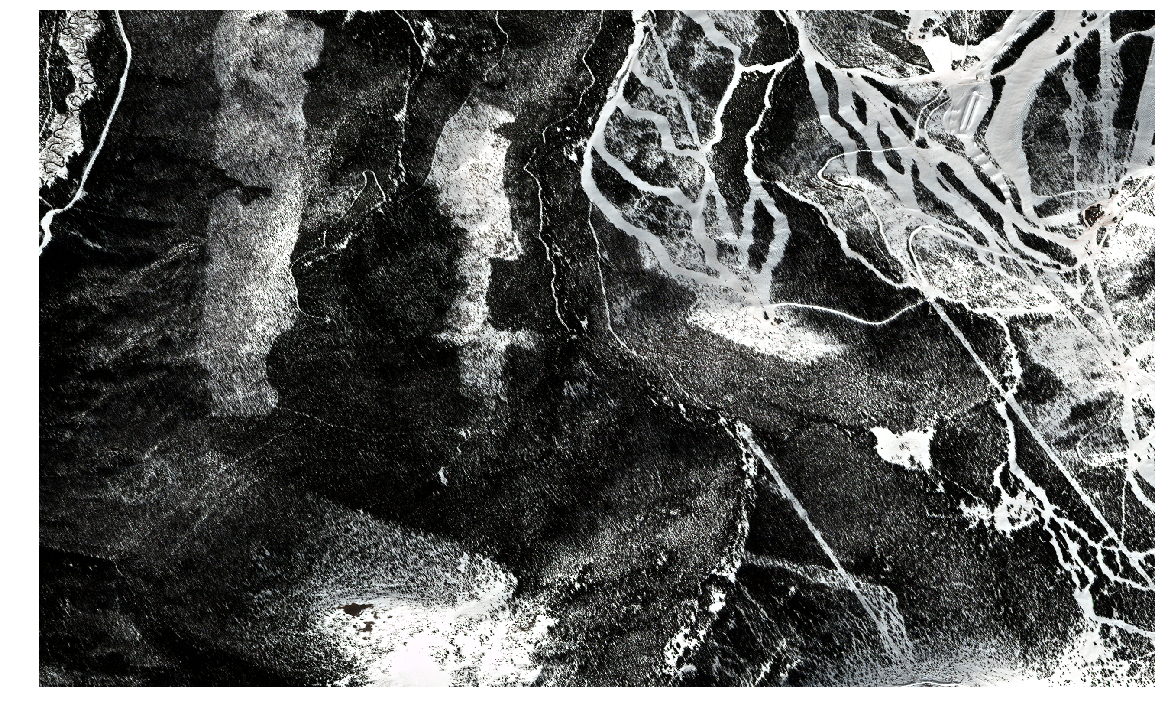

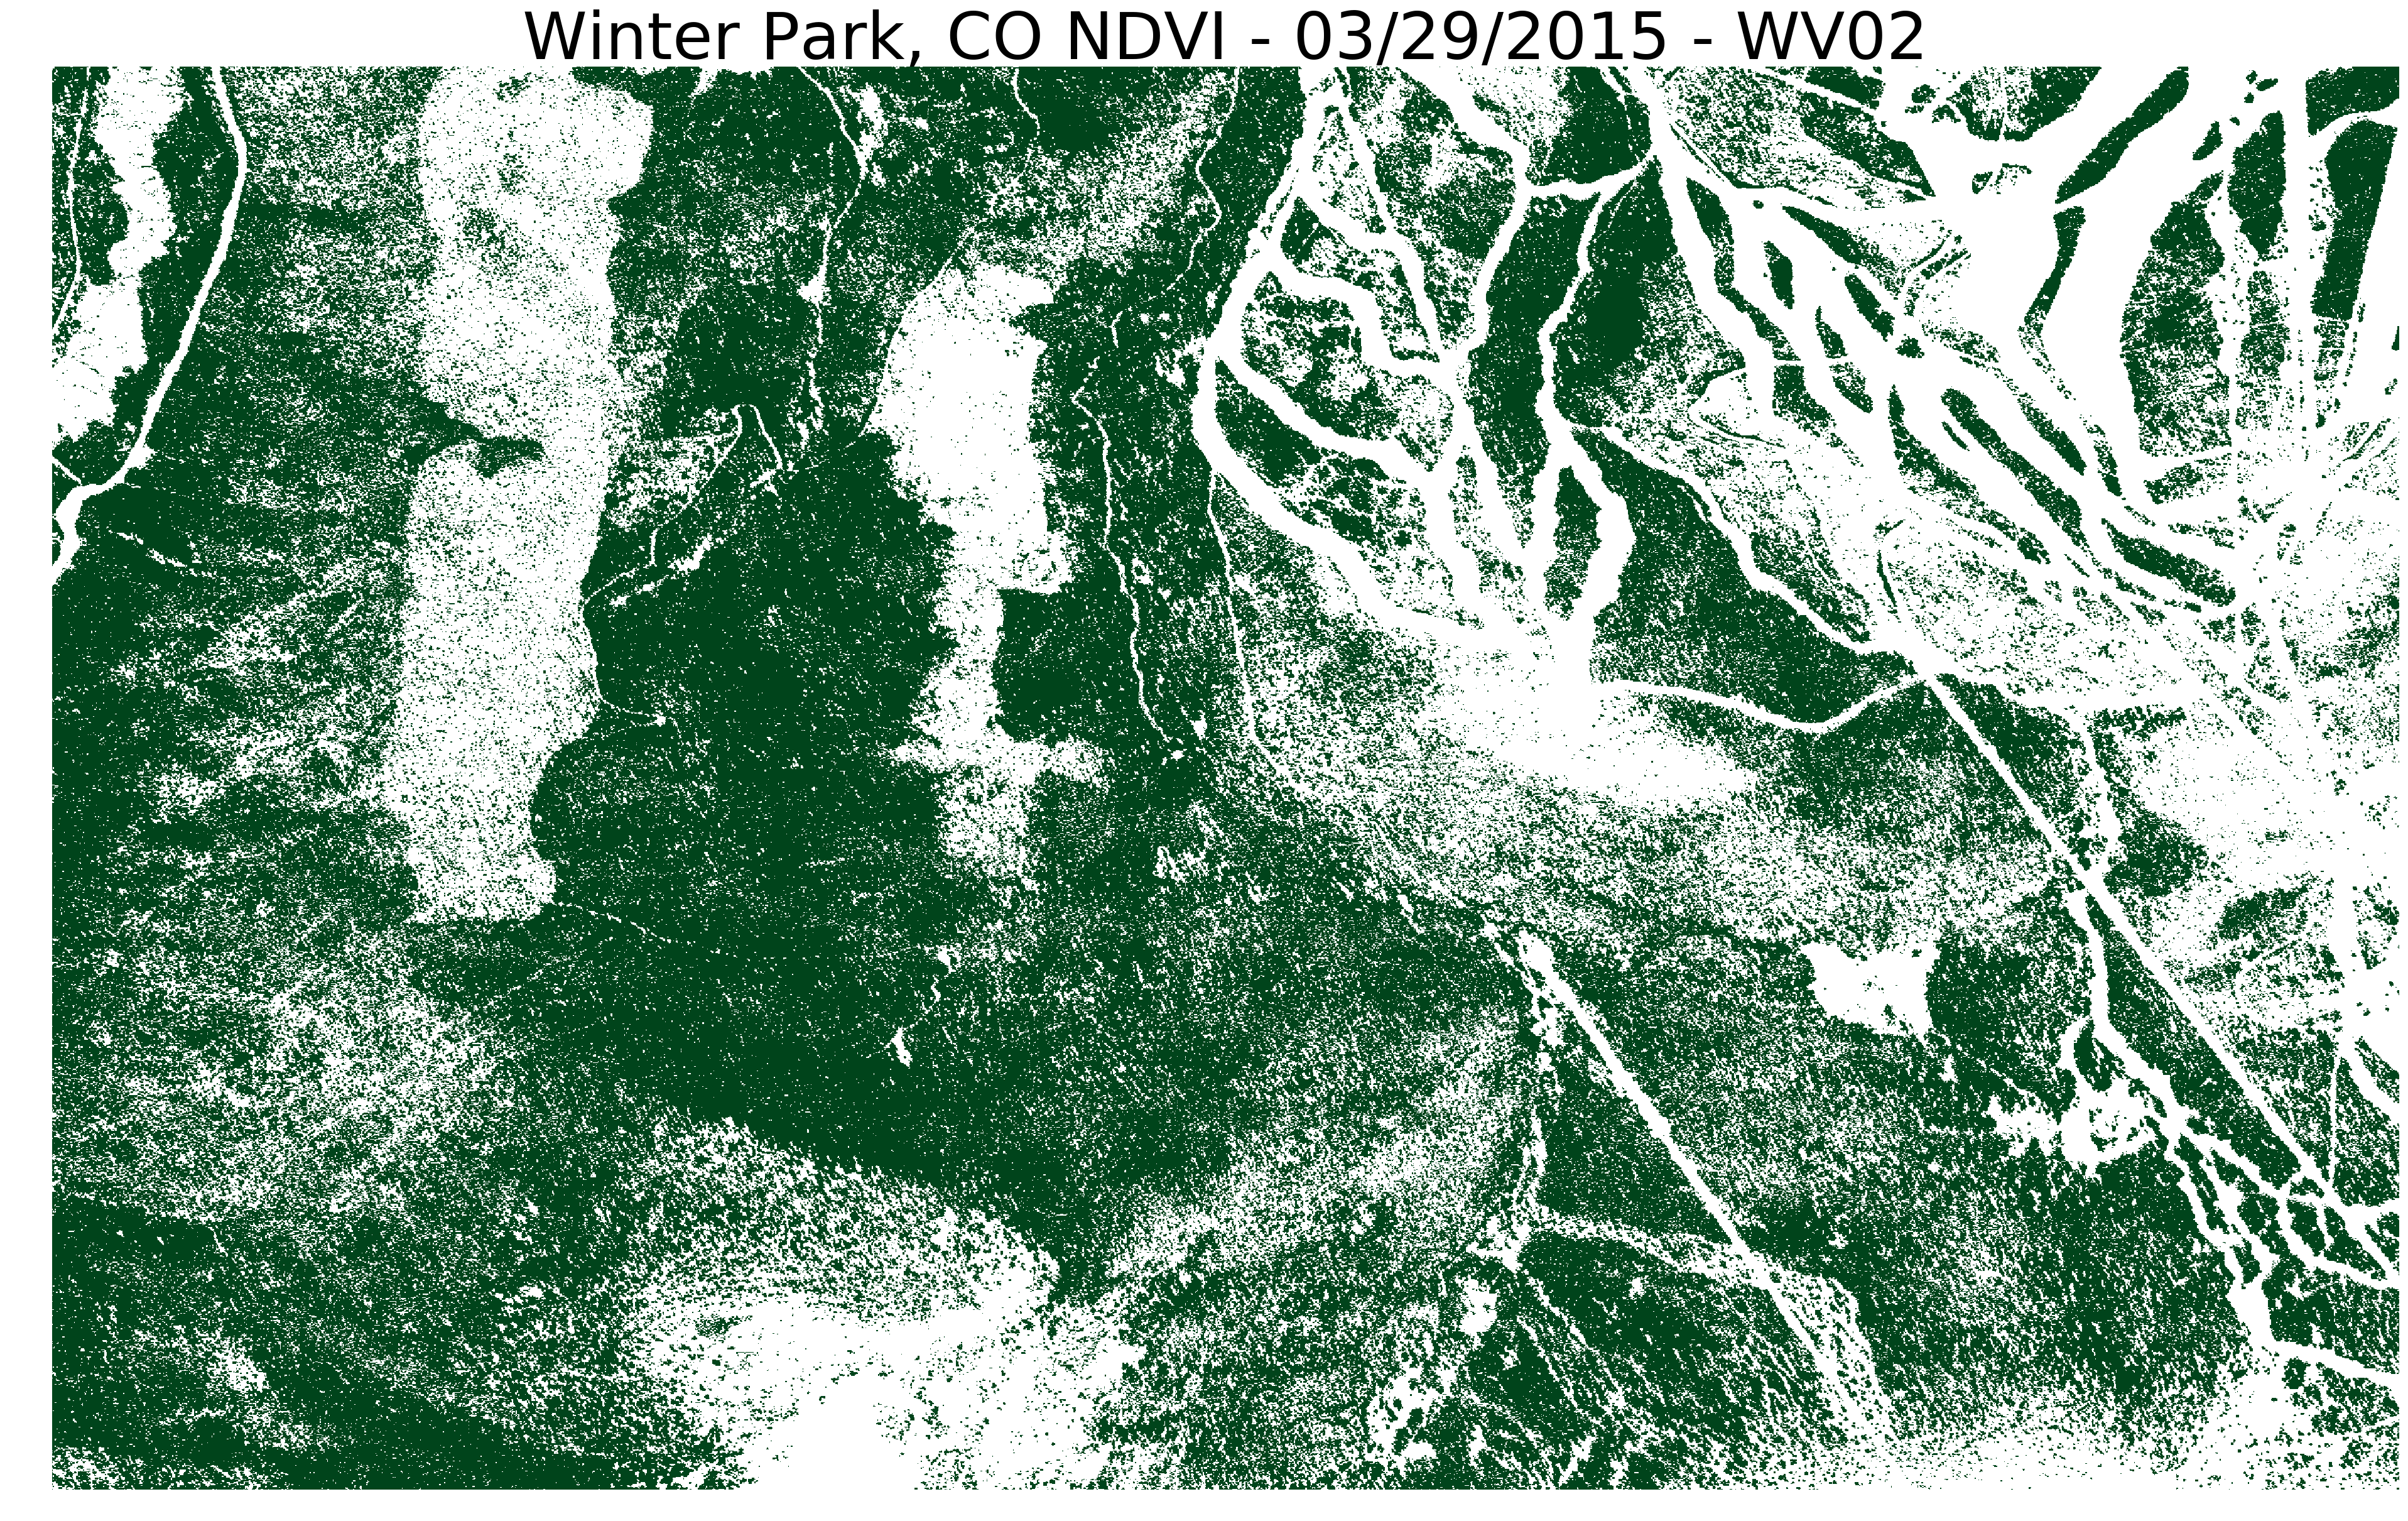

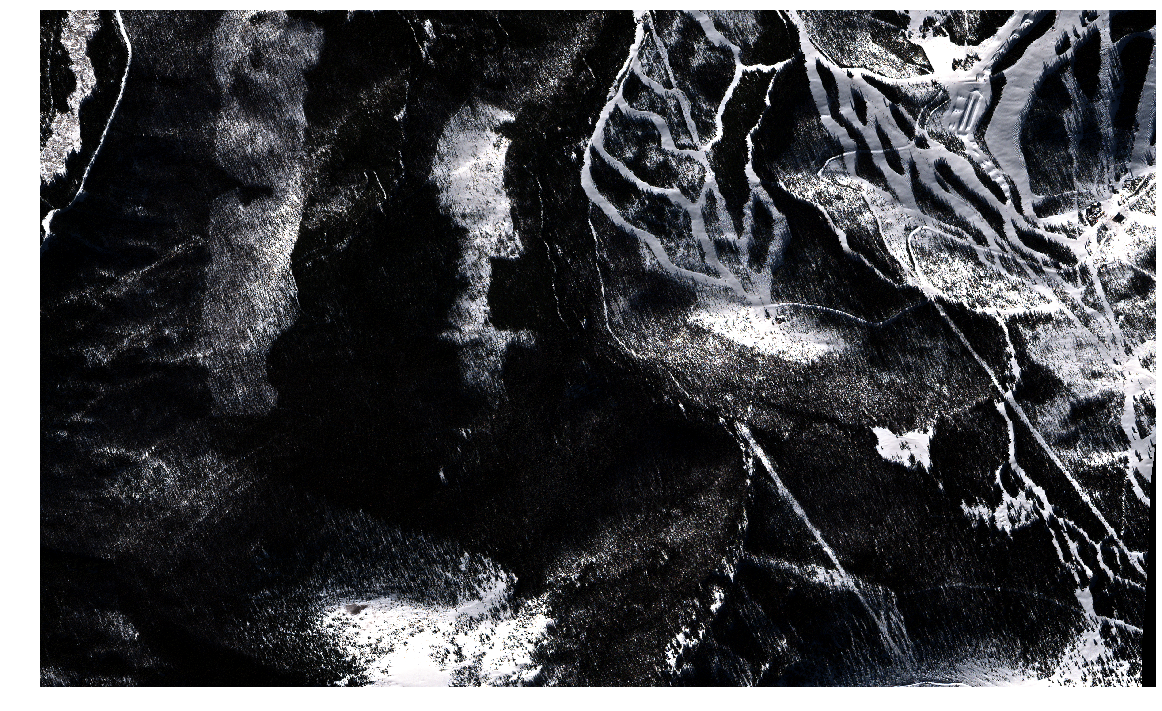

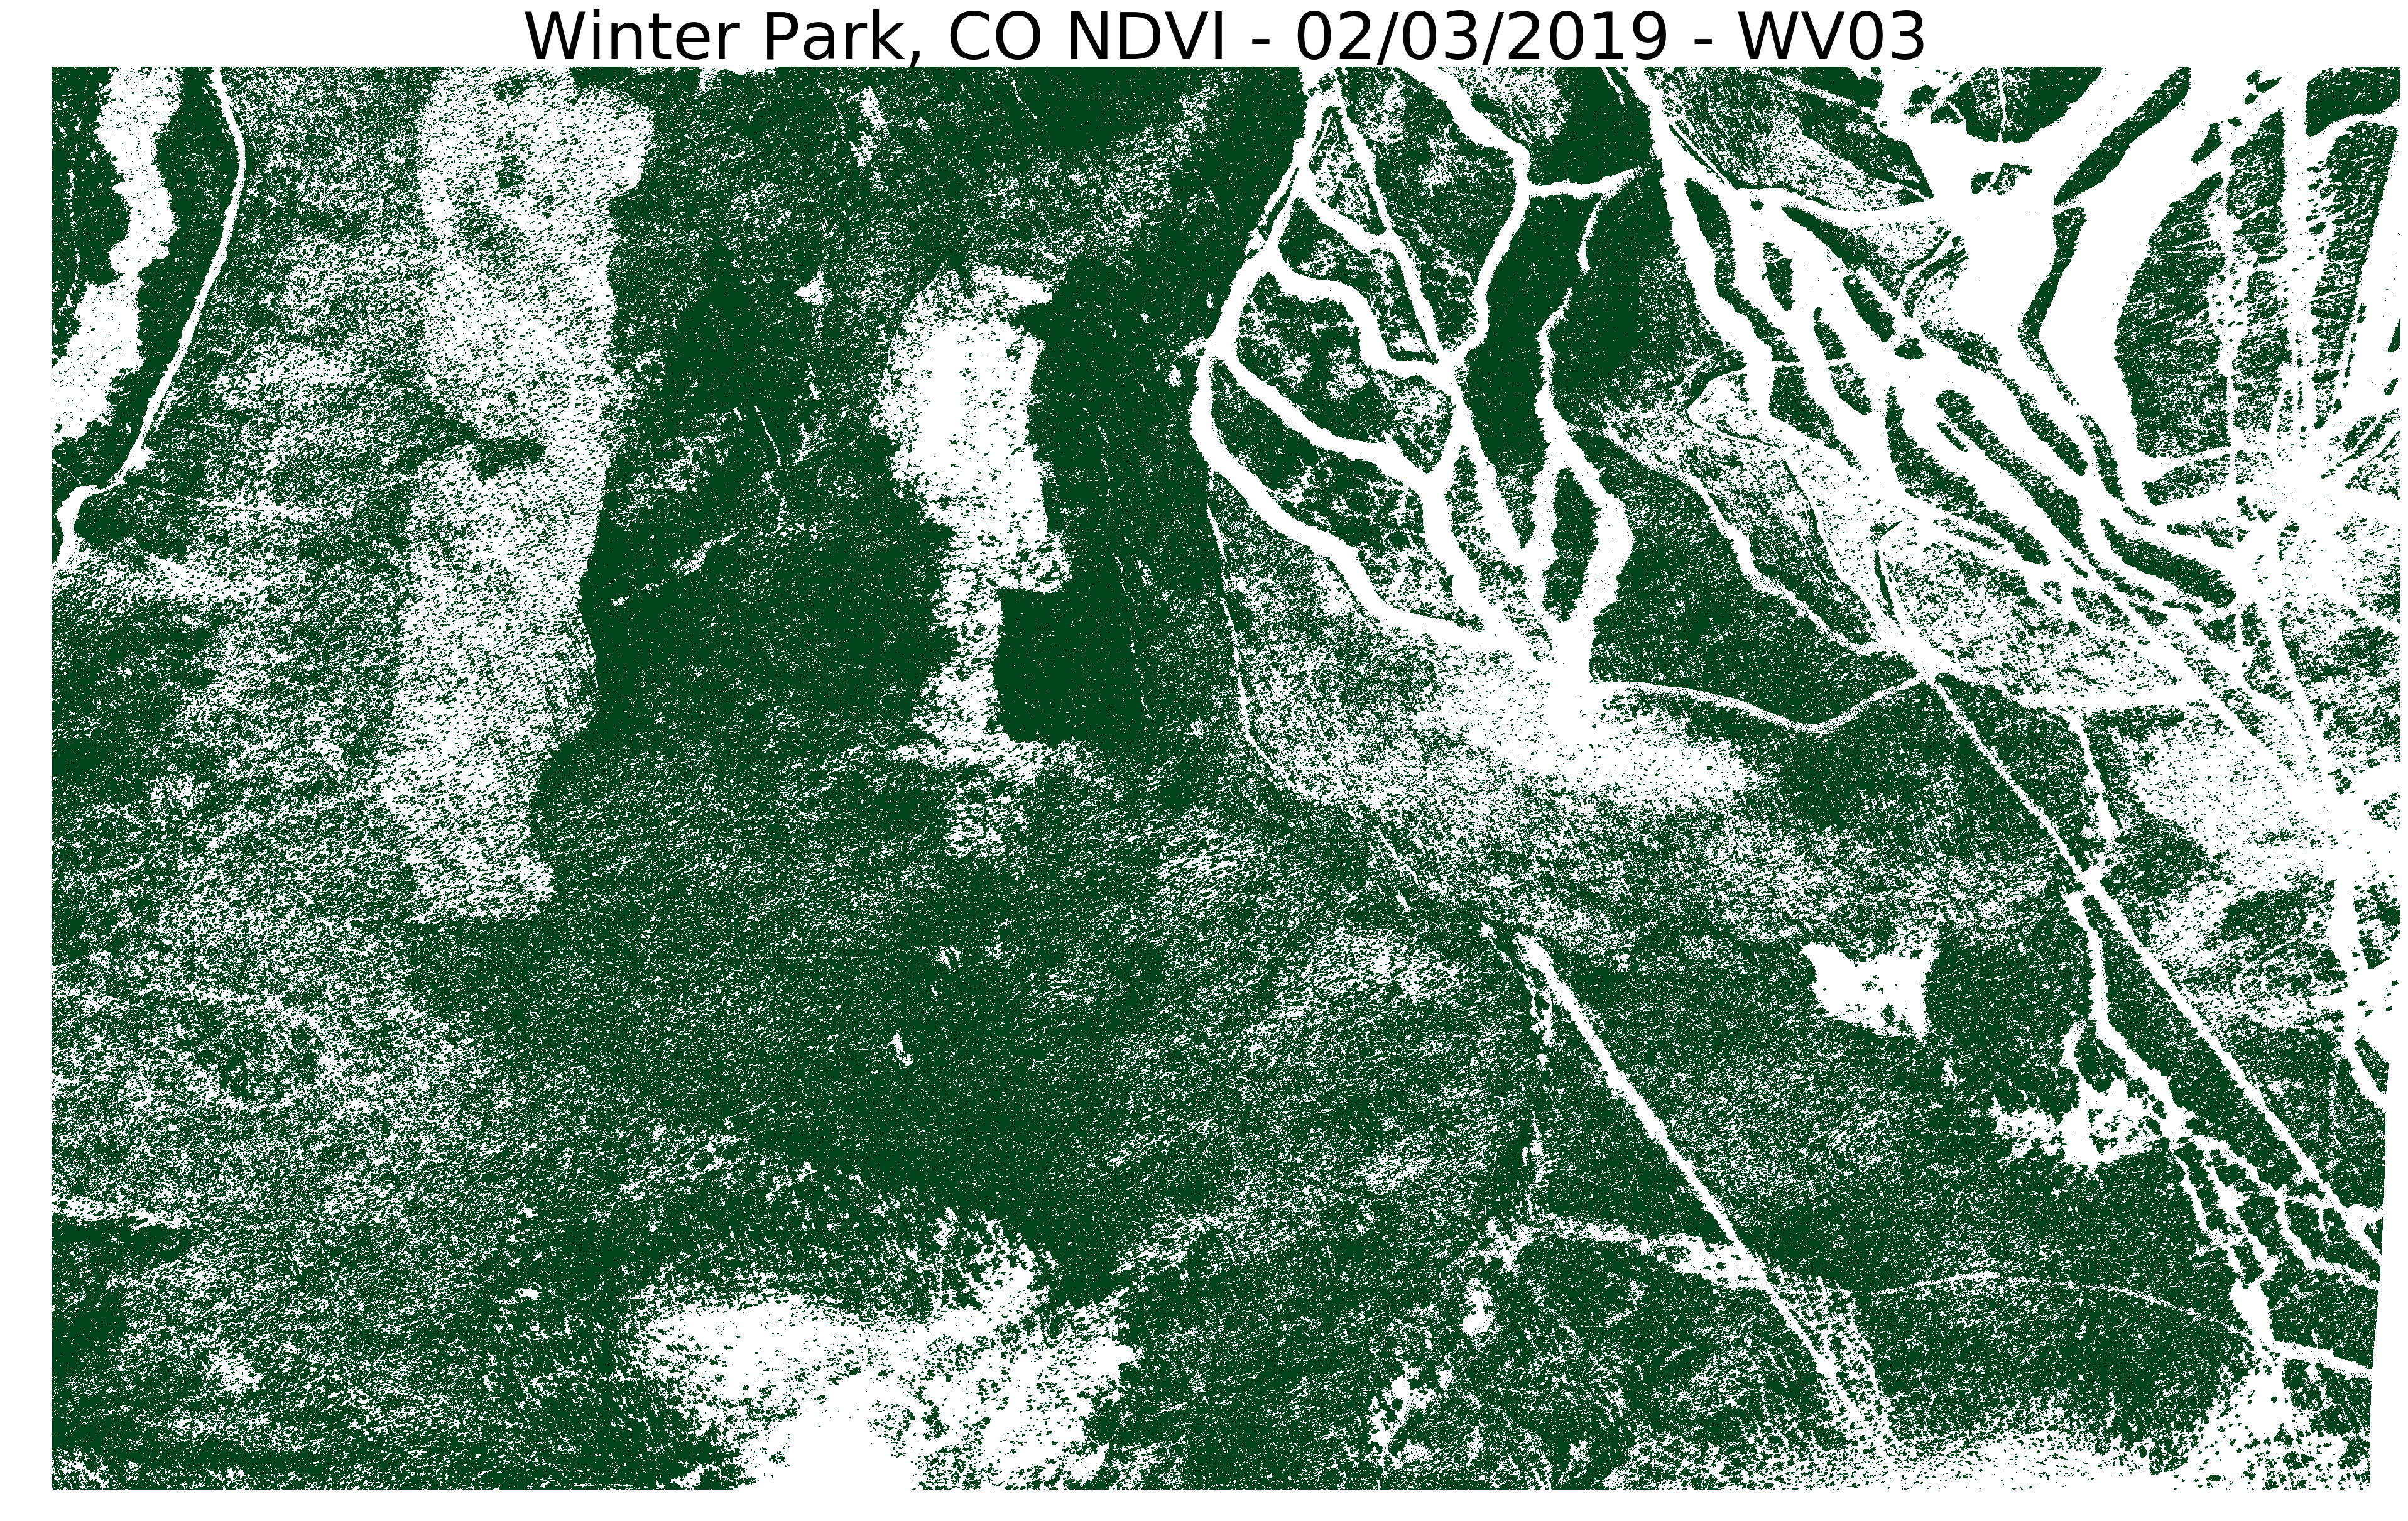


Area stats
AOI Area:	0.0011580499999999056
Before:	852.7362019775002
After:	888.5810228160002
Difference:	-35.84482083850003 hectares



In [3]:
from gbdxtools import CatalogImage
from gbdxtools.task import env
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from shapely.geometry import shape
%matplotlib inline


def gen_ndvi(image):
    '''
    generates ndvi values then transforms them to remove noise and create a boolean mask
    also returns the area of the detected vegetation in hectares
    '''
    ndvi_vals = image.ndvi()
    # remove all nan values first so we don't get excpetions when performing
    # below transformations
    ndvi_cutoff = 0.1
    ndvi_vals[np.isnan(ndvi_vals)] = 0
    ndvi_vals[ndvi_vals >= ndvi_cutoff] = 1
    ndvi_vals[ndvi_vals < ndvi_cutoff] = np.nan    
    
    # calculate area by summing up number of pixels and multiplying by the pixel resolution
    # in available in the image metadata
    px_count = (ndvi_vals == 1).sum()
    area = px_count * image.metadata['image']['groundSampleDistanceMeters']**2 * 0.0001
    return ndvi_vals, area

def plot_ndvi(ndvi_vals, title=None):
    '''
    use matplotlib to plot a numpy array
    '''
    fig, ax = plt.subplots(figsize=(40, 20), dpi=150)
    ndvi = ax.imshow(ndvi_vals, cmap='Greens', vmin=0, vmax=1)
    #fig.colorbar(ndvi, fraction=.05)
    ax.set_title(label=title)
    ax.set_axis_off()
    plt.show()    

# set some matplotlib defaults
mpl.rcParams['axes.titlesize'] = 50

# set our AOI
bbox = (-105.8173, 39.8563, -105.7736, 39.8828)

# get the wv02 imagery from 03/29/2015
wv02_catalog_id = env.inputs.get('catalog_id', '103001003F135000')
wv02_image = CatalogImage(wv02_catalog_id, band_type="MS", bbox=bbox, acomp=True)

# get the wv03 imagery from 02/03/2019 
wv03_catalog_id = env.inputs.get('catalog_id', '10400100479E8F00')
wv03_image = CatalogImage(wv03_catalog_id, band_type="MS", bbox=bbox, acomp=True)

# calculate ndvi and area for the before image
wv02_ndvi, wv02_area = gen_ndvi(wv02_image)
wv02_image.plot(w=20, h=20)
plot_ndvi(wv02_ndvi, "Winter Park, CO NDVI - 03/29/2015 - WV02")

# calculate ndvi and area for the after image
wv03_ndvi, wv03_area = gen_ndvi(wv03_image)
wv03_image.plot(w=20, h=20)
plot_ndvi(wv03_ndvi, "Winter Park, CO NDVI - 02/03/2019 - WV03")

# calculate the difference in vegetation to plot
#plot_ndvi(np.subtract(wv02_ndvi, wv03_ndvi))
print(f"""
Area stats
AOI Area:\t{shape(wv02_image).area}
Before:\t{wv02_area}
After:\t{wv03_area}
Difference:\t{wv02_area - wv03_area} hectares
""")

In [ ]:
import rasterio
from rasterio.enums import Resampling

with rasterio.open("example.tif") as dataset:
    data = dataset.read(
        out_shape=(dataset.height * 2, dataset.width * 2, dataset.count),
        resampling=resampling.bilinear
    )


In [128]:
from gbdxtools import Interface
import pprint
gbdx = Interface()

wkt='POLYGON((-105.92124938964845 39.86179016415043, -105.92124938964845 39.93395994977674, -105.78117370605469 39.93395994977674, -105.78117370605469 39.86179016415043, -105.92124938964845 39.86179016415043))'
filters=[
    "cloudCover < 10"
]
startDate="2019-02-03T00:00:00.000Z"
endDate="2019-02-04T00:00:00.000Z"
types=[
    "Acquisition",
]

results = gbdx.catalog.search(searchAreaWkt=wkt, filters=filters, types=types, startDate=startDate, endDate=endDate)
#pprint.pprint(results)

In [134]:
from gbdxtools.task import env
from gbdxtools import CatalogImage
%matplotlib inline

bbox = (-105.92124938964845, 39.86179016415043, -105.78117370605469, 39.93395994977674)

wv03_catalog_id = env.inputs.get('catalog_id', '10400100479E8F00')
wv03_image = CatalogImage(wv03_catalog_id, band_type="MS", bbox=bbox, acomp=True, bands=[1,2,4,6])
georef = wv03_image.metadata['georef']['scaleX']
print(georef['scaleX'])
print(georef['scaleY'])
#wv03_image.geotiff(path="wv03-acomp-ms.tif")

1.2001437297879986e-05
-1.2001437297879986e-05


In [45]:
from gbdxtools.task import env
from gbdxtools import CatalogImage
%matplotlib inline

bbox = (-105.92124938964845, 39.86179016415043, -105.78117370605469, 39.93395994977674)

wv02_catalog_id = env.inputs.get('catalog_id', '103001003F135000')
wv02_image = CatalogImage(wv02_catalog_id, band_type="MS", bbox=bbox, acomp=True, bands=[1,2,4,6])
wv02_image.geotiff(path="wv02-acomp-ms.tif")

In [47]:
from gbdxtools import DemImage

aoi = [-105.92124938964845, 39.86179016415043, -105.78117370605469, 39.93395994977674]
dem = DemImage(aoi)
dem.geotiff(path='dem.tif')
print(dem.shape)

(1, 267, 517)


In [8]:
from gbdxtools.task import env
from gbdxtools import CatalogImage
%matplotlib inline

catalog_id = env.inputs.get('catalog_id', '1040010003D08700')
bbox = (-105.86151123046876, 39.83174093314556, -105.7643508911133, 39.92369224734411)

#image = CatalogImage(catalog_id, band_type="MS", bbox=bbox, acomp=True)
#image.geotiff(path="wv03-red-acomped.tiff", bands=[4])
#image.geotiff(path="wv03-nir-acomped.tiff", bands=[6])
#image.geotiff(path="wv03-rgb-acomped.tiff", spec='rgb')

#image = CatalogImage(catalog_id, band_type="MS", pansharpen=True, bbox=bbox, acomp=True)
#image.geotiff(path="wv03-pan-acomped.tiff")

In [4]:
from gbdxtools.task import env
from gbdxtools import CatalogImage
import dask
!pip install --upgrade gbdxtools > /dev/null
%matplotlib inline

# WV4
catalog_id = env.inputs.get('catalog_id', '7a36ef24-e4a5-446d-8582-64ceca52f0a1-inv')
bbox = (-105.86151123046876, 39.83174093314556, -105.7643508911133, 39.92369224734411)

image = CatalogImage(catalog_id, band_type="MS", pansharpen=True, bbox=bbox, acomp=True)
image.geotiff(path="wv04-red-acomped-panned.tiff", bands=[2])
image.geotiff(path="wv04-nir-acomped-panned.tiff", bands=[3])
image.geotiff(path="wv04-rgb-acomped-panned.tiff", spec='rgb')

#image = CatalogImage(catalog_id, band_type="Pan", bbox=bbox)
#image.geotiff(path="wv04-pan.tiff")

'wv04-rgb-acomped-panned.tiff'